# RAPPORT Machine Learning 2025 
**Salmi, Adam**

**Salzenstein, Gaspar**

## Clustering

Le Clustering est une méthode d'apprentissage non-supervisée qui consiste au regroupement de données non labélisées en comparant leurs similarités/différences.

### K-Means

La méthode des K-Means est une façon (la plus logique du point de vue humain) de faire du Clustering. Cette méthode regroupe des "pôles" de points en essayant, par itération successive de minimiser la variance intra-cluster. Toutefois, cela suppose d'une part de connaître à l'avance le nombre de cluster et d'autre part les "pôles" doivent nécessairement être sphériques, ce qui limite beaucoup le type de données qui peut être utilisé avec cette méthode.

Appel K-Means pour plusieurs valeurs de k, sans soucis
nb clusters =  2 , sil_score =  0.6305972114000131 , davis_score =  0.5418013301909271 , cal_score =  2386.4259543247335  , nb iter =  3  ,runtime =  4.66  ms 
nb clusters =  3 , sil_score =  0.4701886484665538 , davis_score =  0.9521144832659688 , cal_score =  1541.3672506529535  , nb iter =  5  ,runtime =  1.38  ms 
nb clusters =  4 , sil_score =  0.36064934833689605 , davis_score =  1.145333032498911 , cal_score =  1445.8426513415282  , nb iter =  10  ,runtime =  2.19  ms 
nb clusters =  5 , sil_score =  0.3681934368413031 , davis_score =  0.9798450579765918 , cal_score =  1406.4089940082356  , nb iter =  14  ,runtime =  3.08  ms 
nb clusters =  6 , sil_score =  0.38130468588634203 , davis_score =  0.8351957102366064 , cal_score =  1485.6912684111383  , nb iter =  14  ,runtime =  2.64  ms 
nb clusters =  7 , sil_score =  0.3997976520595972 , davis_score =  0.8141646412716353 , cal_score =  1552.82680195569  , nb iter =  11  ,run

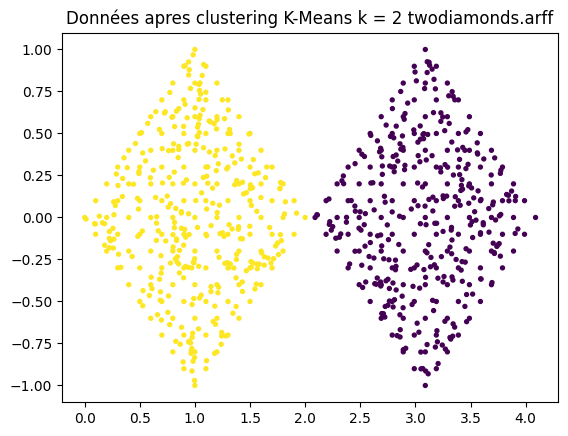

nb clusters =  2 , sil_score =  0.47418143741570656 , davis_score =  0.7808831254303358 , cal_score =  515.5041617551458  , nb iter =  5  ,runtime =  1.24  ms 
nb clusters =  3 , sil_score =  0.6171807766046922 , davis_score =  0.5159747512886118 , cal_score =  1204.3195506314394  , nb iter =  4  ,runtime =  2.46  ms 
nb clusters =  4 , sil_score =  0.5351805879594083 , davis_score =  0.8108785226368317 , cal_score =  1035.7597614577487  , nb iter =  11  ,runtime =  1.42  ms 
nb clusters =  5 , sil_score =  0.44893203023665135 , davis_score =  0.8652933073222476 , cal_score =  1073.7982489262786  , nb iter =  27  ,runtime =  4.25  ms 
nb clusters =  6 , sil_score =  0.40648124965787763 , davis_score =  0.8945331810999734 , cal_score =  975.995682735853  , nb iter =  9  ,runtime =  1.59  ms 
nb clusters =  7 , sil_score =  0.4073485121955744 , davis_score =  0.8624236271417018 , cal_score =  1030.55952259267  , nb iter =  11  ,runtime =  1.92  ms 
nb clusters =  8 , sil_score =  0.42264

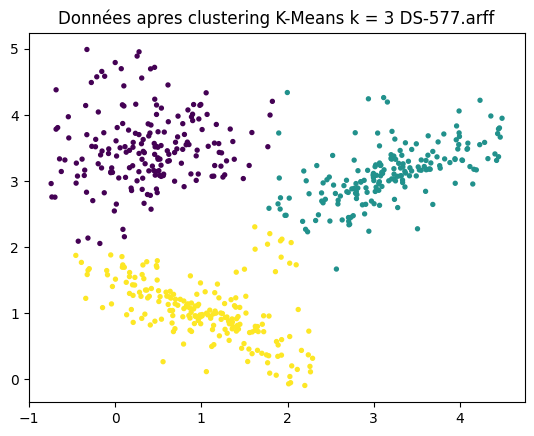

nb clusters =  2 , sil_score =  0.42462132277347137 , davis_score =  1.095247783773391 , cal_score =  765.8994158732044  , nb iter =  7  ,runtime =  2.18  ms 
nb clusters =  3 , sil_score =  0.4576722021385437 , davis_score =  0.7484209670281153 , cal_score =  961.7354462323422  , nb iter =  4  ,runtime =  1.84  ms 
nb clusters =  4 , sil_score =  0.5973265109573306 , davis_score =  0.5168282516187686 , cal_score =  2075.6965259576164  , nb iter =  4  ,runtime =  1.32  ms 
nb clusters =  5 , sil_score =  0.5161795901076901 , davis_score =  0.7997993526311101 , cal_score =  1760.0213453219903  , nb iter =  12  ,runtime =  2.56  ms 
nb clusters =  6 , sil_score =  0.45352008479494926 , davis_score =  0.927412392243416 , cal_score =  1528.7450881129894  , nb iter =  16  ,runtime =  3.0  ms 
nb clusters =  7 , sil_score =  0.38168555654942454 , davis_score =  1.0606606525938083 , cal_score =  1467.5333216975748  , nb iter =  10  ,runtime =  2.65  ms 
nb clusters =  8 , sil_score =  0.35240

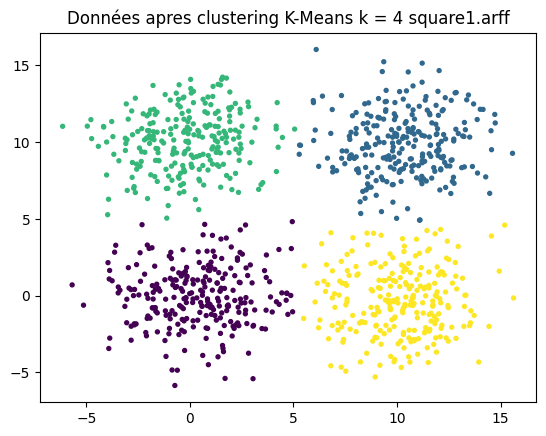

In [11]:
import numpy as np
import matplotlib . pyplot as plt
from scipy . io import arff
import time
from sklearn import cluster

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Appel K-Means pour plusieurs valeurs de k, sans soucis")

names = ["twodiamonds.arff", "DS-577.arff", "square1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        sil_score = silhouette_score(datanp, model.fit_predict(datanp))
        davis_score = davies_bouldin_score(datanp, model.fit_predict(datanp))
        cal_score = calinski_harabasz_score(datanp, model.fit_predict(datanp))

        if sil_score > best_score:
            best_score = sil_score
            best_k = k
        print ("nb clusters = " , k , ", sil_score = ", sil_score, ", davis_score = ", davis_score, ", cal_score = ", cal_score, " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    plt.scatter ( f0 , f1 , c=labels , s = 8 )
    plt.title ( "Données apres clustering K-Means k = " + str(best_k) + " " + name)
    plt.show ()

Nous avons dans cette partie étudié 3 jeux de données adaptées pour le K-Means et ce avec un `k` allant de 2 à 8 avec une selection du meilleur `k` pour les 3 :
- **twodiamond**
- **DS-577**
- **square1**

Pour chacun des jeux de données, le `k`choisi est celui qui, sans lancer l'algorithme, nous parait le plus logique. On remarquera que l'algorithme converge assez rapidement (au plus 25 itération), ce qui rend cet algorithme plutôt rapide (exécution jamais au-dessus des 5 ms).

Pour ces 3 jeu de données le résultats obtenu avec le K-Means est très satisfaisant.

Appel KMeans pour plusieurs valeurs de k, avec soucis
nb clusters =  2 , score =  0.3179557608030209  , nb iter =  2  ,runtime =  1.1  ms 
nb clusters =  3 , score =  0.34278066141054764  , nb iter =  7  ,runtime =  1.88  ms 
nb clusters =  4 , score =  0.32403441047746956  , nb iter =  7  ,runtime =  2.47  ms 
nb clusters =  5 , score =  0.34255640938150556  , nb iter =  16  ,runtime =  3.53  ms 
nb clusters =  6 , score =  0.3027031035582672  , nb iter =  15  ,runtime =  2.85  ms 
nb clusters =  7 , score =  0.34595917642475776  , nb iter =  23  ,runtime =  4.74  ms 
nb clusters =  8 , score =  0.35022839621234036  , nb iter =  12  ,runtime =  2.98  ms 


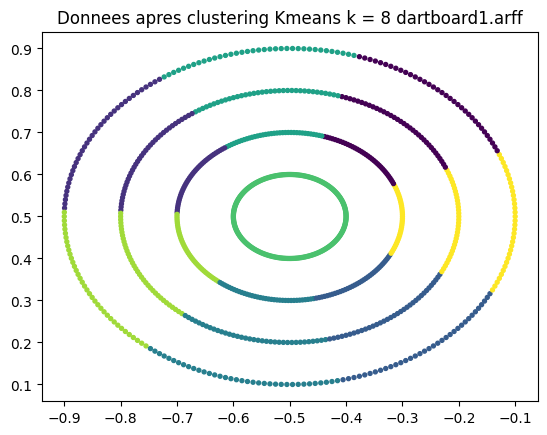

nb clusters =  2 , score =  0.42923500278067134  , nb iter =  6  ,runtime =  2.01  ms 
nb clusters =  3 , score =  0.4046887106869073  , nb iter =  16  ,runtime =  3.18  ms 
nb clusters =  4 , score =  0.4202539218154093  , nb iter =  15  ,runtime =  3.42  ms 
nb clusters =  5 , score =  0.4428775944597709  , nb iter =  14  ,runtime =  3.31  ms 
nb clusters =  6 , score =  0.4681260373993528  , nb iter =  9  ,runtime =  2.59  ms 
nb clusters =  7 , score =  0.4872889494106479  , nb iter =  11  ,runtime =  2.89  ms 
nb clusters =  8 , score =  0.468697749161234  , nb iter =  9  ,runtime =  2.53  ms 


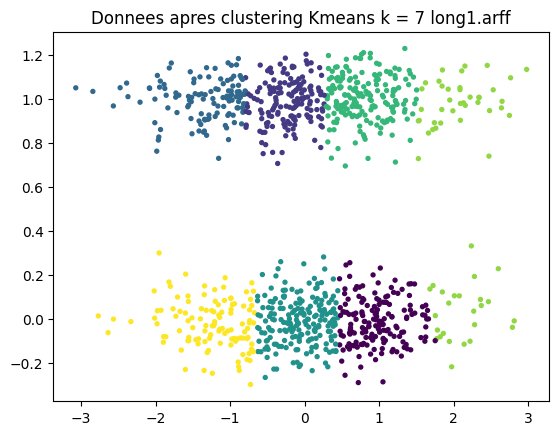

In [12]:
print("Appel KMeans pour plusieurs valeurs de k, avec soucis")

names = ["dartboard1.arff", "long1.arff"]
best_ks = []

for name in names:

    path = "./artificial/"
    databrut = arff.loadarff(open(path + name,'r', encoding='utf-8'))
    datanp = [[x[0], x[1]] for x in databrut [0]]

    f0 = np.array(datanp)[:,0]
    f1 = np.array(datanp)[:,1]  

    best_score = 0

    for k in range(2, 9):

        tps1 = time.time()
        model = cluster.KMeans(n_clusters=k, init = 'k-means++')
        model.fit(datanp)
        tps2 = time.time()

        labels = model.labels_
        iteration = model.n_iter_
        
        score = silhouette_score(datanp, model.fit_predict(datanp))

        if score > best_score:
            best_score = score
            best_k = k
        print ("nb clusters = " , k , ", score = ", score, " , nb iter = " , iteration , " ,runtime = " , round (( tps2 - tps1 ) * 1000 , 2 ) ," ms " ) 

    best_ks.append(best_k)
    model = cluster.KMeans(n_clusters=best_k, init='k-means++')
    model.fit(datanp)
    labels = model.labels_
    plt.scatter ( f0 , f1 , c=labels , s = 8 )
    plt.title ( "Donnees apres clustering Kmeans k = " + str(best_k) + " " + name)
    plt.show ()

Pareil qu'a la section précédente nous avons analysé les résultats avec un K-Means sur 2 jeu de données, cette fois ci plus problématique :
- **dartboard1 :** Les points de données forment des cercles, en regardant le choix apporté par l'algorithme (`k = 8`), il est évident que le choix n'est pas le bons puisque l'on observe 4 cercles distincts.
- **long1 :** Encore ici, le choix de `k = 8` ne parait pas bon, humainement on aperçois 2 nuages de points.

À travers ces 2 jeux de données, on observe très bien le problème du K-Means. Il est très sensible à la géométrie des données et suppose ses clusters comme étant sphériques (l'utilisation de la norme euclidienne est un problème, c.f. le 2nd exemple où le nuage de points est étiré).

En conclusion le K-Means est très efficace (en terme de prédiction et de temps d'entraînement) mais cela à un prix : celui de n'absoluement pas être flexible à la structure des données.

## AGGLOMERATIVE

 Dendrogramme 'single' donnees initiales 


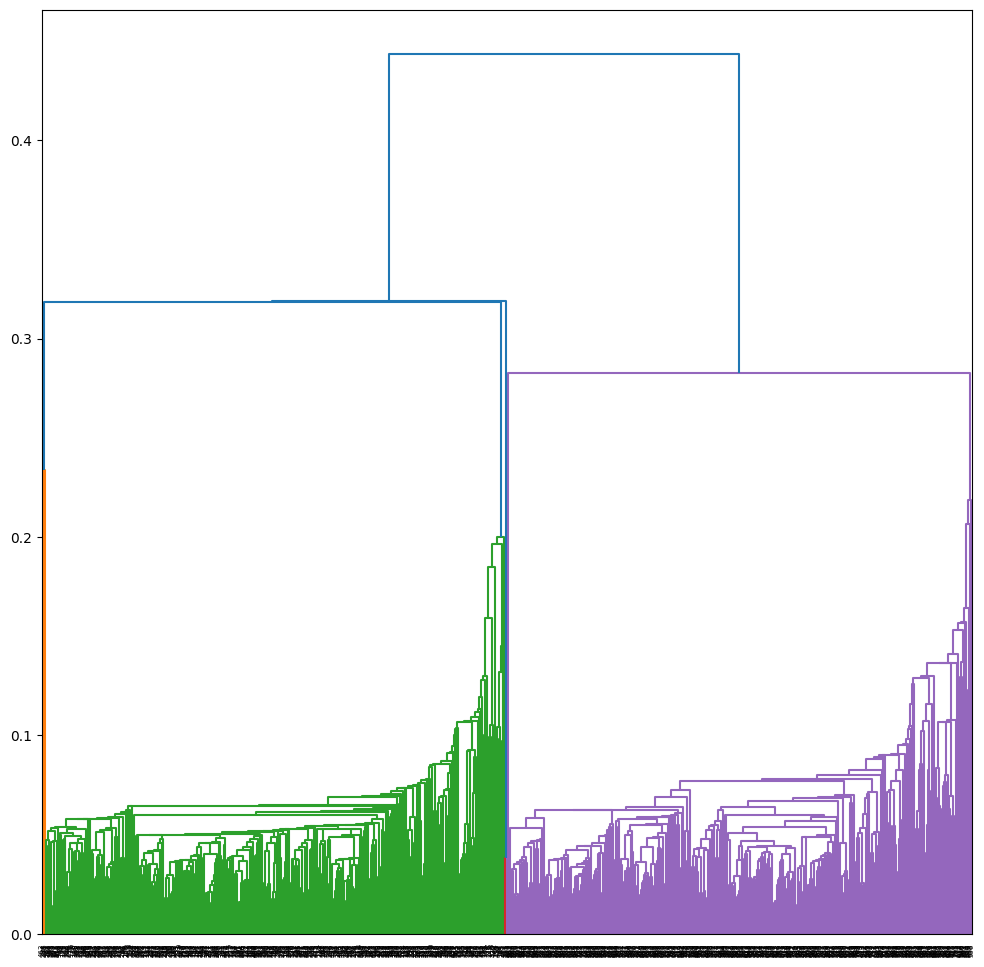

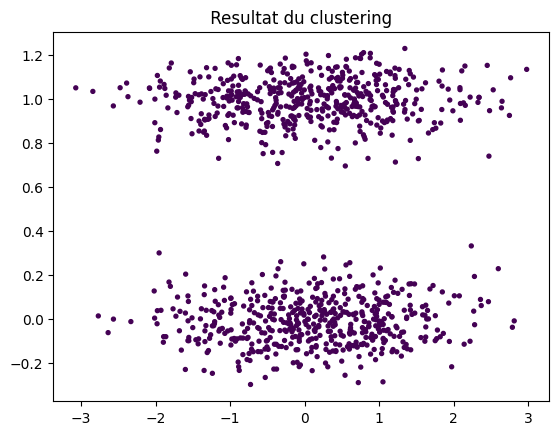

 nb clusters =  1  , nb feuilles =  1000  runtime =  5.71  ms 


In [14]:
import scipy . cluster . hierarchy as shc

print ( " Dendrogramme 'single' donnees initiales " )
linked_mat = shc.linkage ( datanp , 'single')
plt.figure(figsize=(12,12))
shc.dendrogram(linked_mat, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.show()

# set distance_threshold ( 0 ensures we compute the full tree )
tps1 = time . time ()
model = cluster.AgglomerativeClustering(distance_threshold=10, linkage='single', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_

# Affichage clustering
plt.scatter( f0 , f1 , c = labels , s = 8 )
plt.title(" Resultat du clustering ")
plt.show()
print(" nb clusters = ", k, " , nb feuilles = ", leaves, " runtime = ", round((tps2 - tps1)*1000, 2), " ms ")

# set the number of clusters
k = 2
tps1 = time.time()
model = cluster.AgglomerativeClustering (linkage='single', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_